# Imagerie médicale

In [2]:
ls

Applications/   Histog_IRM.png  Movies/         brain.jpeg      mask.bmp
Desktop/        Ho_Reseau@      Music/          brain.jpg       mask.png
Documents/      Library/        Pictures/       brain2.jpg      tumor.png
Downloads/      Local@          Public/         imagerie.ipynb


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [5]:
brain = imread('brain.jpg')

In [6]:
brain.shape

(202, 165, 3)

In [32]:
brain2 = imread('brain2.jpg')

In [33]:
brain2.shape

(279, 216, 3)

In [35]:
tumor = imread('tumor.png')

In [38]:
tumor.shape

(419, 344, 4)

In [39]:
print(tumor[100, 100])

[0.40392157 0.40392157 0.40392157 1.        ]


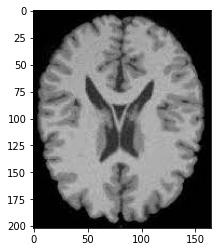

In [10]:
plt.imshow(brain);

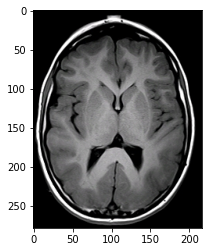

In [11]:
plt.imshow(brain2);

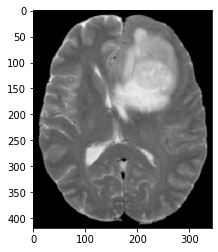

In [13]:
plt.imshow(tumor);

In [17]:
brain = brain[:,:,0]

In [18]:
brain.shape

(202, 165)

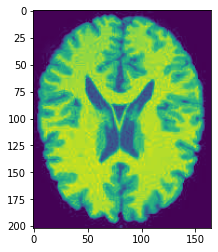

In [19]:
plt.imshow(brain);

(279, 216)


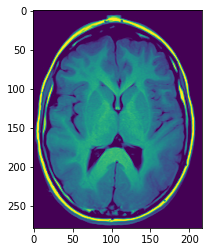

In [23]:
brain2 = brain2[:,:,0]
print(brain2.shape)
plt.imshow(brain2);

In [40]:
tumor = tumor[:,:,0]
print(tumor.shape)

(419, 344)


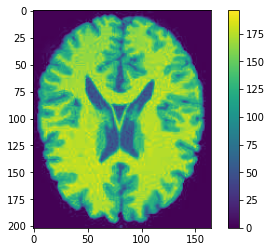

In [31]:
plt.imshow(brain);
plt.colorbar();

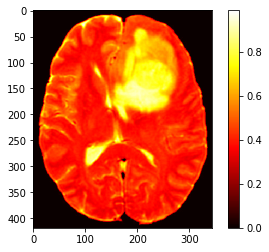

In [28]:
plt.imshow(tumor, cmap='hot')
plt.colorbar();

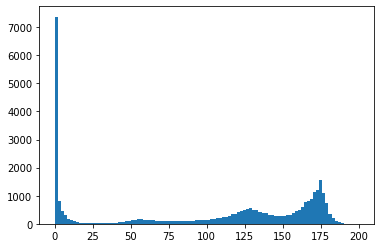

In [42]:
plt.hist(brain.ravel(), bins=100, range=(0.0, 200));

In [44]:
brain.max()

196

Text(0.5, 1.0, 'gray matter vs. white matter')

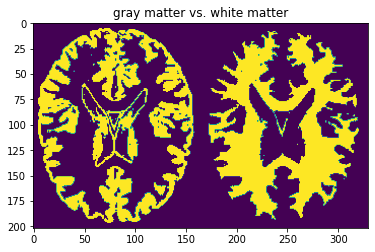

In [121]:
gm = brain.copy() * 0
wm = brain.copy() * 0 

for i in range(brain.shape[0]):
    for j in range(brain.shape[1]):
        if 70 <= brain[i,j] < 150:
            gm[i,j]  = 1
        elif 150 <= brain[i,j] <= 255:
            wm [i,j] = 1
plt.imshow(np.hstack([gm, wm]));
plt.title('gray matter vs. white matter')

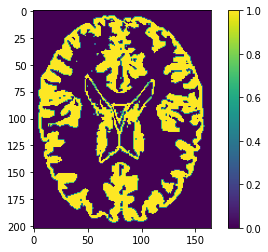

In [49]:
plt.imshow(gm)
plt.colorbar();

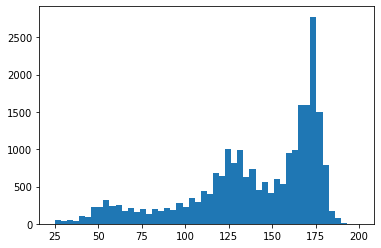

In [125]:
plt.hist(brain.ravel(), bins=50, range=(25, 200));

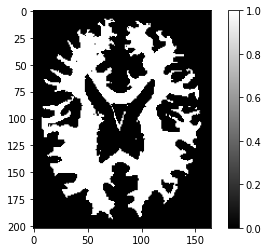

In [50]:
plt.imshow(wm, cmap='gray')
plt.colorbar();

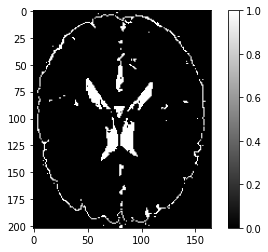

In [51]:
plt.imshow(csf, cmap='gray')
plt.colorbar();

In [52]:
def classification(img, s1, s2, s3):

    gm = brain.copy() * 0
    wm = brain.copy() * 0 
    csf = brain.copy() * 0

    for i in range(brain.shape[0]):
        for j in range(brain.shape[1]):
            if s1 <= brain[i,j] < s2:
                csf[i,j] = 1
            elif s2 <= brain[i,j] < s3:
                gm[i,j]  = 1
            elif s3 <= brain[i,j] <= 255:
                wm [i,j] = 1
                
    return gm, wm, csf

In [53]:
gm, wm, csf =classification(brain2, 17, 50, 150)

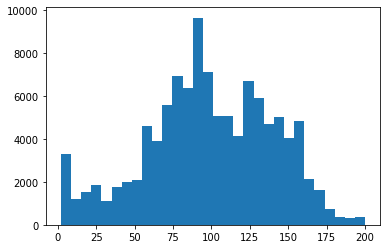

In [62]:
plt.hist(brain2.ravel(), bins=30, range=(2, 200));

Text(165, 600, 'wm')

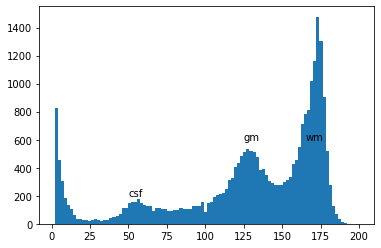

In [77]:
plt.hist(brain.ravel(), bins=100, range=(2, 200));
plt.text(50, 200, 'csf')
plt.text(125, 600, 'gm')
plt.text(165, 600, 'wm')

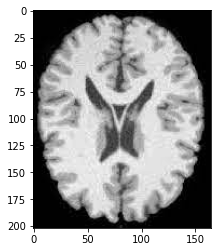

In [67]:
plt.imshow(brain, cmap='gray')

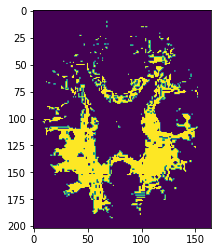

In [79]:
plt.imshow(brain > 170)

In [96]:
plt.imshow(150 < brain < 175);

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

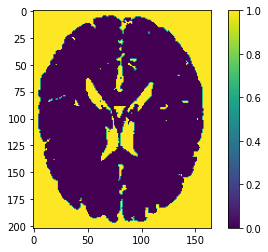

In [92]:
plt.imshow(brain < 75);
plt.colorbar()

In [100]:
gm = gm * 3
wm = wm * 2
segmentation = gm+csf+wm

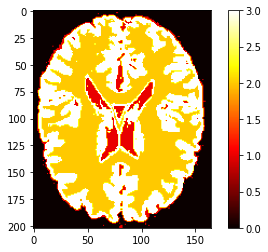

In [102]:
np.unique(segmentation)
plt.imshow(segmentation,cmap = 'hot')

plt.colorbar();

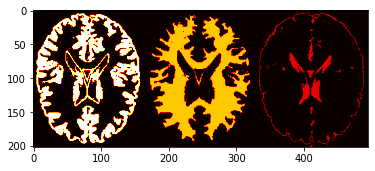

In [103]:
All = np.hstack([gm, wm, csf])
plt.imshow(All, cmap = 'hot');

## Segmentation

In [109]:
segmentation = np.zeros_like(brain)
n, m = brain.shape

for i in range(n):
    for j in range(m):
        if 15 <= brain[i,j] < 70:
            segmentation[i,j] = 1
        elif 70 <= brain[i,j] < 150:
            segmentation[i,j]  = 2
        elif 150 <= brain[i,j] <= 255:
            segmentation [i,j] = 3

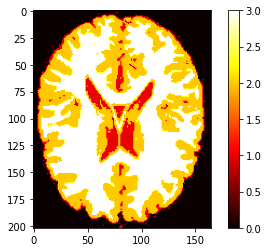

In [110]:
plt.imshow(segmentation, cmap = 'hot')
plt.colorbar();

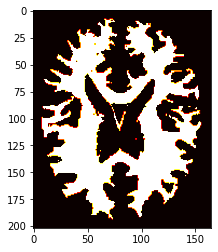

In [113]:
plt.imshow(segmentation==3, cmap = 'hot')